# Time Series Analysis, Forecasting Using ARIMA Model

# 1. Import Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 2. Load Dataset

In [18]:
data = pd.read_csv('/content/sales-of-shampoo-over-a-three-ye.csv')

data_desc = data.describe()
null_sum = data.isnull().sum()

print(data_desc, null_sum)

       Sales of shampoo over a three year period
count                                  36.000000
mean                                  312.600000
std                                   148.937164
min                                   119.300000
25%                                   192.450000
50%                                   280.150000
75%                                   411.100000
max                                   682.000000 Month                                        0
Sales of shampoo over a three year period    0
dtype: int64


# 3. Convert Month to DateTime

In [19]:
data['Month'] = pd.date_range(start='2000-01-01', periods=len(data),freq='M')
data.set_index('Month', inplace = True)


# 4. Plot the Time Series

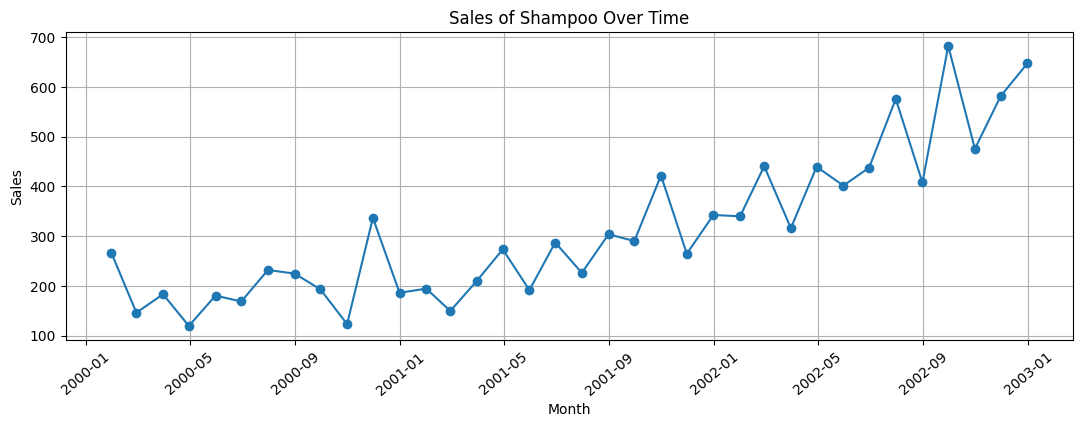

In [29]:
plt.figure(figsize=(13,4))
plt.plot(data.index,data['Sales of shampoo over a three year period'],marker='o')
plt.title('Sales of Shampoo Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation = 40)
plt.show()

# 5. Decomposition

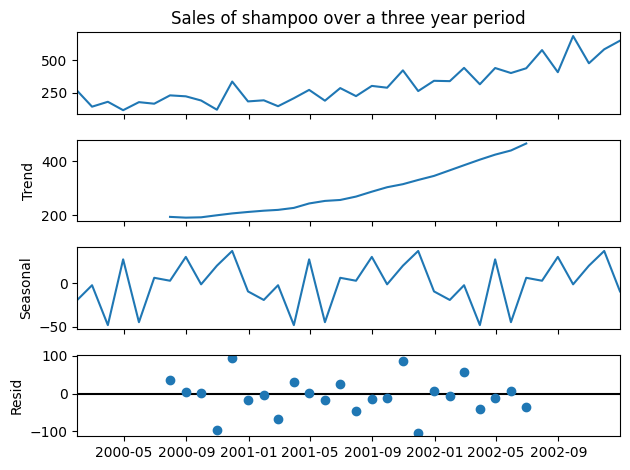

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Sales of shampoo over a three year period'], model='additive')
fig = decomposition.plot()
plt.show()

# 6. Forecasting with ARIMA

In [40]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Sales of shampoo over a three year period'])
print('ADF Statistics: ', adf_test[0])
print('p-value: ', adf_test[1])

ADF Statistics:  3.060142083641181
p-value:  1.0


# 7. Fit an ARIMA Model

In [42]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['Sales of shampoo over a three year period'], order=(1,1,1))
results = model.fit()

print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   36
Model:                                        ARIMA(1, 1, 1)   Log Likelihood                -200.391
Date:                                       Wed, 13 Mar 2024   AIC                            406.782
Time:                                               03:34:30   BIC                            411.448
Sample:                                           01-31-2000   HQIC                           408.393
                                                - 12-31-2002                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6003     

# 8. Forecasting the Future Values

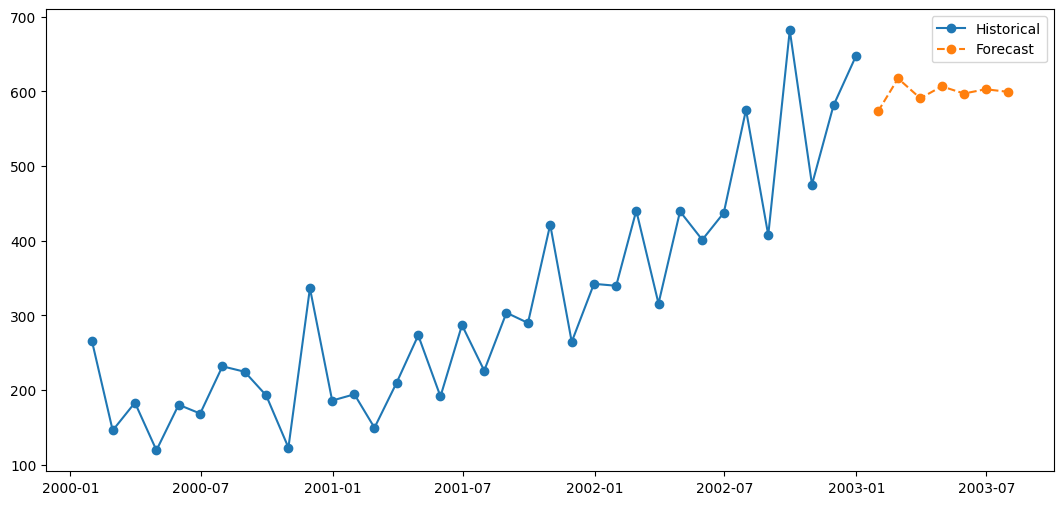

In [61]:
forecast = results.forecast(steps=7)

plt.figure(figsize=(13,6))
plt.plot(data.index,data['Sales of shampoo over a three year period'], label='Historical', marker='o')
plt.plot(forecast.index,forecast,label='Forecast', marker='o', linestyle = 'dashed')
plt.legend()
plt.show()